Import Python packages

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import dataset

In [2]:
df = pd.read_csv("C:/Users/trung/CCDS/data/processed/df.csv")

df.head(5)

,name,year,poverty-rate,median-household-income,rent-burden,pct-white,households-threatened,eviction-filing-rate,total-crime
0,Baltimore City,2000,22.92,30078,26.9,30.96,58207.75,124.17,66791
1,Baltimore City,2001,22.92,30078,26.9,30.96,52564.67,111.08,64453
2,Baltimore City,2002,22.92,30078,26.9,30.96,57183.58,121.05,56550
3,Baltimore City,2003,22.92,30078,26.9,30.96,57039.41,116.82,49263
4,Baltimore City,2004,22.92,30078,26.9,30.96,60221.48,109.42,48314


Add a column returning value = 1 if metropolitan jurisdiction and 0 if non-metropolitan jurisdiction

In [11]:
metro_juris = ["Frederick County", "Prince George's County", "Montgomery County"]

df['metropolitan'] = df['name'].apply(lambda x: 1 if x in metro_juris else 0)

In [16]:
df.head(5)

,name,year,poverty-rate,median-household-income,rent-burden,pct-white,households-threatened,eviction-filing-rate,total-crime,metropolitan
0,Baltimore City,2000,22.92,30078,26.9,30.96,58207.75,124.17,66791,0
1,Baltimore City,2001,22.92,30078,26.9,30.96,52564.67,111.08,64453,0
2,Baltimore City,2002,22.92,30078,26.9,30.96,57183.58,121.05,56550,0
3,Baltimore City,2003,22.92,30078,26.9,30.96,57039.41,116.82,49263,0
4,Baltimore City,2004,22.92,30078,26.9,30.96,60221.48,109.42,48314,0


Univariate Analysis

In [17]:
# plot columns
plot_cols = df.columns[2:]


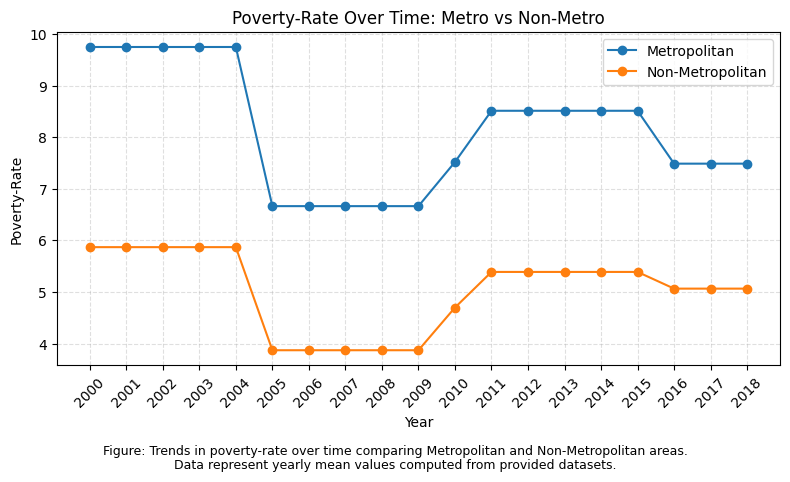

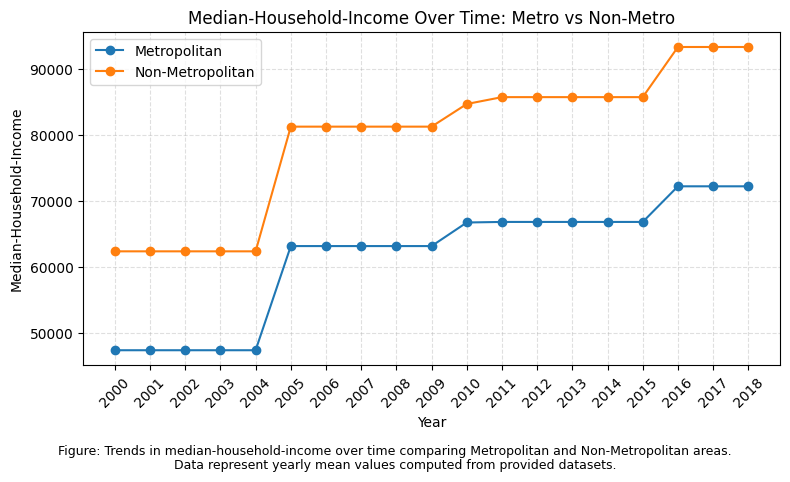

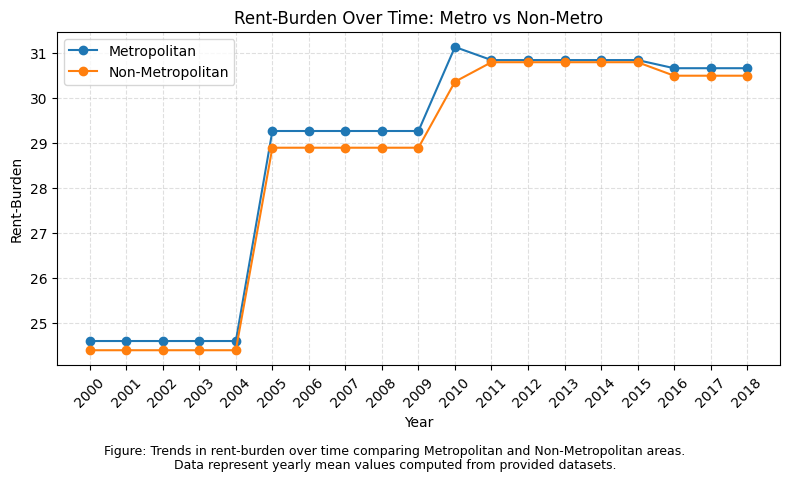

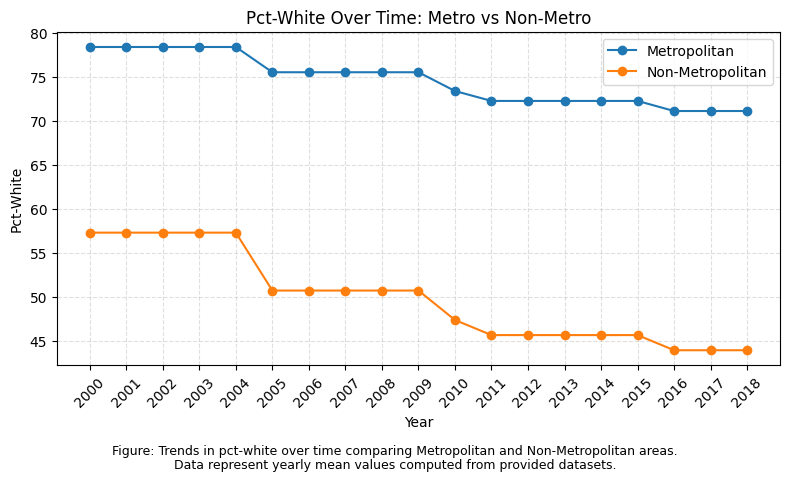

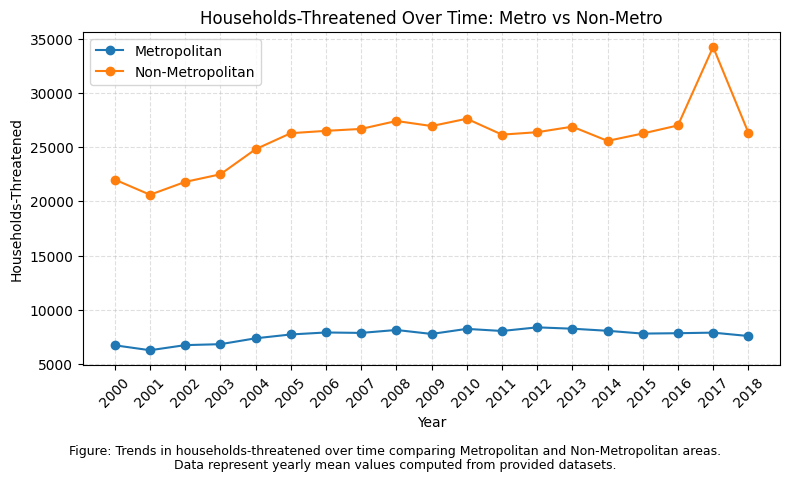

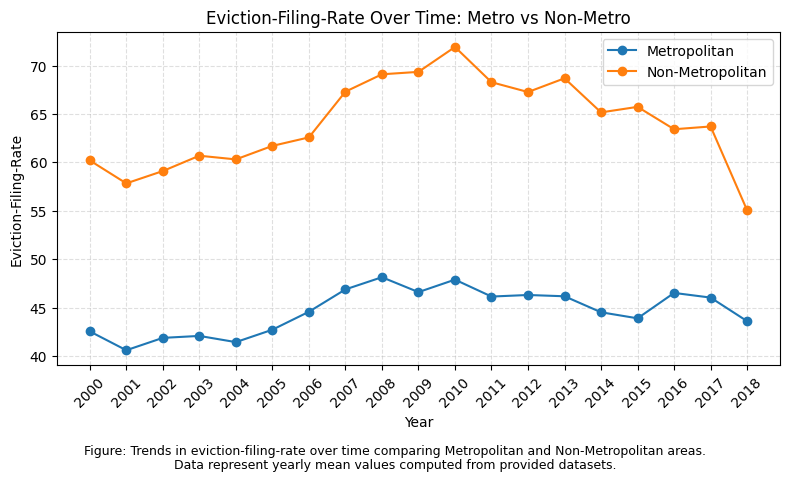

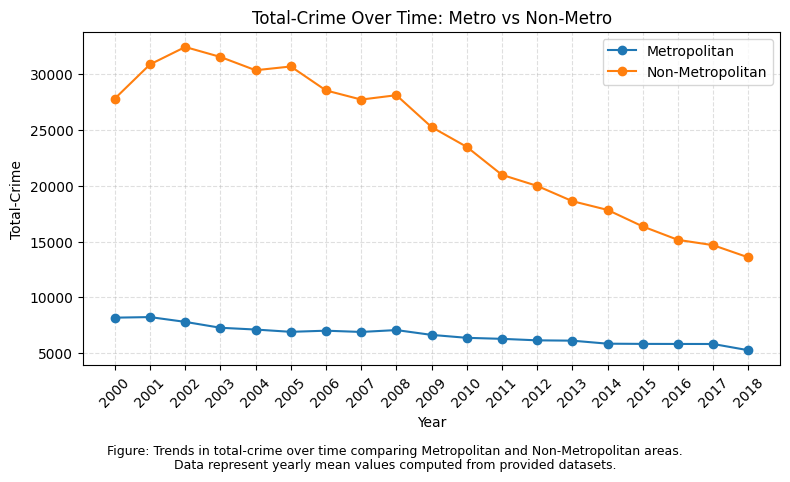

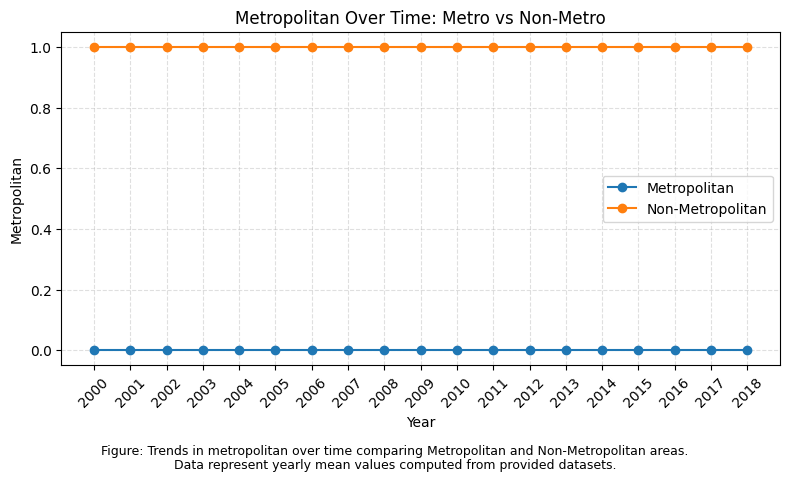

In [26]:
# plot each variable's mean grouped by metropolitan group and year over time
for col in plot_cols:
    # Compute yearly mean by group
    agg = df.groupby(["year", "metropolitan"], as_index=False, dropna=True)[col].mean().reset_index()

    plt.figure(figsize=(8, 4.5))

    # Plot for each group
    for group_name, data in agg.groupby("metropolitan"):
        plt.plot(data["year"], data[col], marker="o", label=group_name)

    # Formatting
    plt.title(f"{col.replace('_', ' ').title()} Over Time: Metro vs Non-Metro")
    plt.xlabel("Year")
    plt.ylabel(col.replace("_", " ").title())
    plt.legend(['Metropolitan', 'Non-Metropolitan'])
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.xticks(agg["year"].unique().astype(int), rotation=45)  # Force whole number years
    plt.tight_layout()

    # Caption
    caption = (
        f"Figure: Trends in {col.replace('_', ' ')} over time comparing Metropolitan and Non-Metropolitan areas.\n"
        f"Data represent yearly mean values computed from provided datasets."
    )
    plt.figtext(0.5, -0.05, caption, wrap=True, ha='center', fontsize=9)